In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors
from scipy import stats
import dispersion_utils as utils
from sklearn.utils import resample


In [2]:
home_folder = "/nethome/manra003/analysis/dispersion/simulations/"

# simulation with maximum resolution - 1/64 deg, n= 370,831
ds1 = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
# ds2 = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
# ds2 = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
ds2 = xr.open_zarr(home_folder + "NewAug2023_DVM_BenguelaUpwR_1ov64_961x641res_Dec2017_1z_100days.zarr") 

# ds2 = xr.open_zarr(home_folder + "Fwd_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
n_particles = len(ds1.lat[:])

DescribeResult(nobs=2000, minmax=(6.0, 104.0), mean=26.164, variance=222.36528664332164, skewness=2.3686080244353187, kurtosis=7.7483424857721985)
DescribeResult(nobs=5000, minmax=(5.0, 104.0), mean=26.4272, variance=223.4857973194639, skewness=2.2610946500770934, kurtosis=6.972210676289805)
DescribeResult(nobs=10000, minmax=(5.0, 104.0), mean=26.6397, variance=245.42602651265122, skewness=2.344137386395674, kurtosis=7.121246912089372)
DescribeResult(nobs=50000, minmax=(5.0, 104.0), mean=26.53514, variance=238.64957817196344, skewness=2.351582282674315, kurtosis=7.24564217828109)
DescribeResult(nobs=100000, minmax=(5.0, 104.0), mean=26.4516, variance=234.46980213802138, skewness=2.3581132585346327, kurtosis=7.386226865298623)
DescribeResult(nobs=200000, minmax=(5.0, 104.0), mean=26.46989, variance=235.4135904558523, skewness=2.3535717390735065, kurtosis=7.321556862178241)
DescribeResult(nobs=300000, minmax=(5.0, 104.0), mean=26.44357, variance=234.32278339771133, skewness=2.35709061567

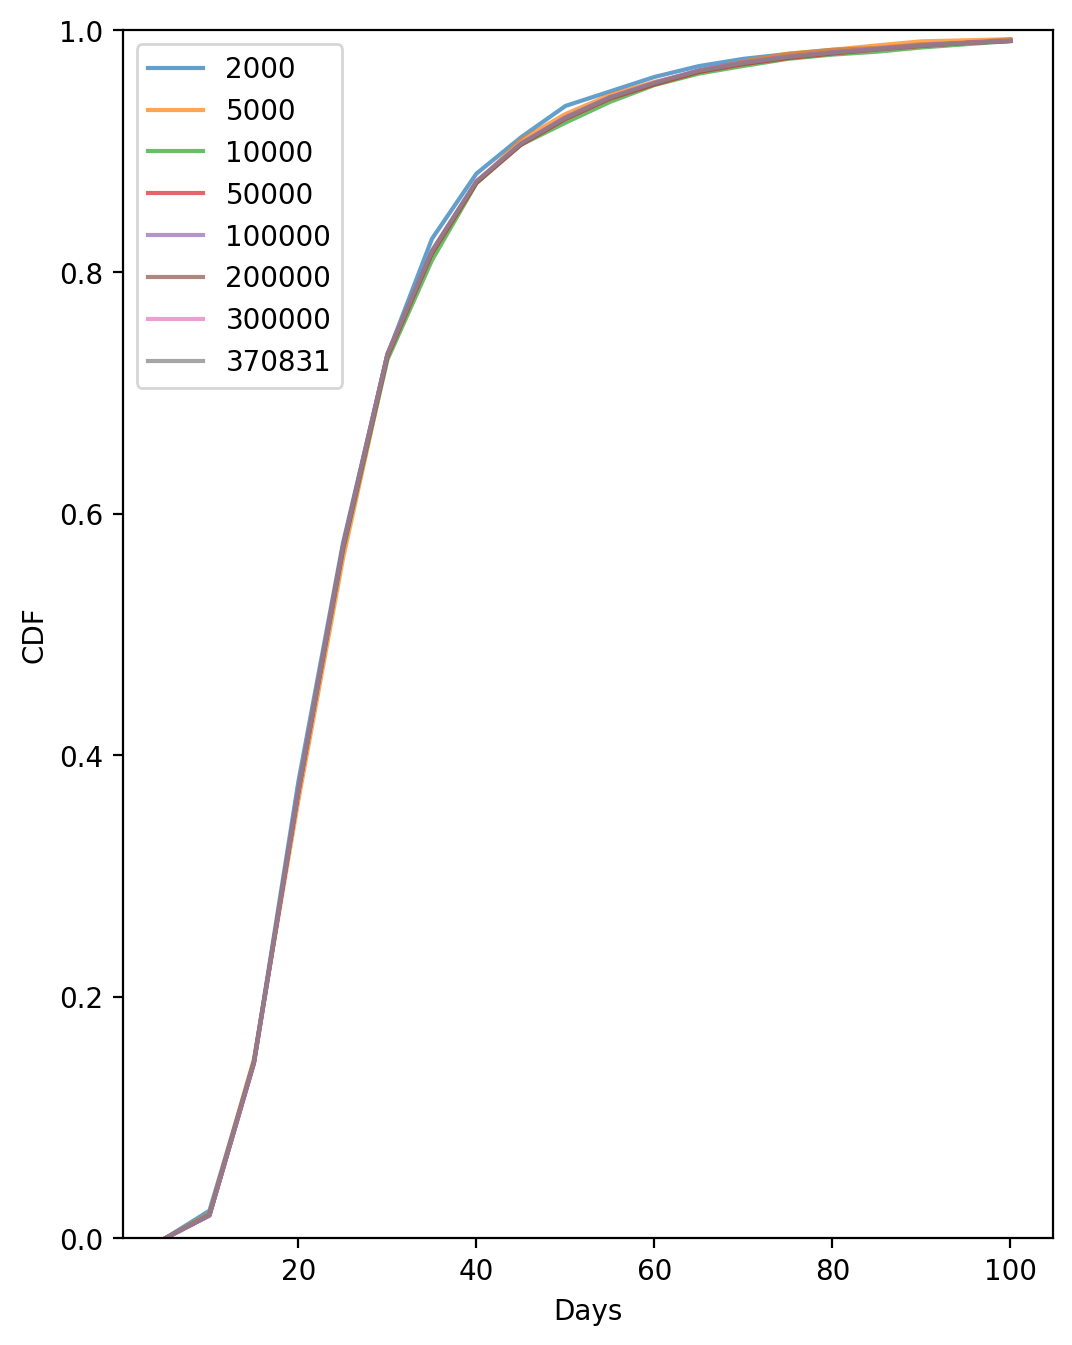

In [3]:
sample_set= [2000, 5000, 10000, 50000, 100000, 200000, 300000, n_particles]
bins=np.arange(0,106,5)
fig=plt.figure(figsize=(6,8), dpi=200)
ax=plt.axes()

for size in sample_set:
    sep_array_1_2 = np.empty((size, 100)) # computing separating distance every 5 fays for the bootstranpping study.
    sep_array_1_2[:] = np.nan

    indices = sorted(resample(np.arange(0, n_particles), replace=False, n_samples=size))
    for time_step in range(100):
        sep_array_1_2[:, time_step] = utils.distance(np.take(ds1['lon'][:, time_step],indices), np.take(ds1['lat'][:, time_step],indices), np.take(ds2['lon'][:, time_step], indices), np.take(ds2['lat'][:, time_step], indices))
   
    cdf12,_ = utils.get_diff_CDF_PDF(sep_array_1_2, 111, bins)
    ax.plot(bins[1:-1], cdf12[:-1], label=size, alpha=0.7)

ax.set_ylim(0,1)
ax.set_ylabel("CDF")
ax.set_xlabel("Days")
ax.legend()

In [4]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

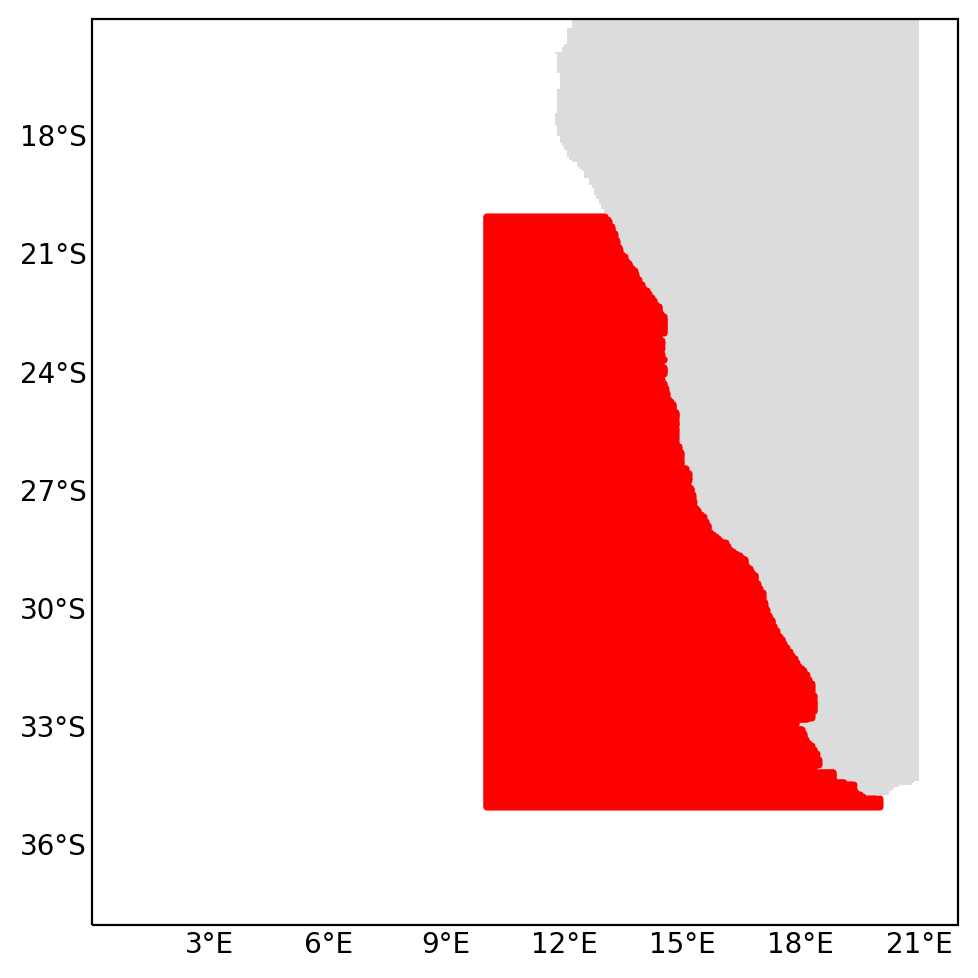

In [9]:

indices = np.arange(0, n_particles)
indices2 = resample(np.arange(0, n_particles), replace=False, n_samples=50000)

custom_size=10
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(8,21)
# ax.set_ylim(-36,-19)
ax.set_xlim(0,22)
ax.set_ylim(-38,-15)
n=50000
ax.scatter(np.take(ds1['lon'][:,0], indices), np.take(ds1['lat'][:,0], indices), s=1, c='red', label="2D")
# ax.scatter(np.take(ds_max['lon'][:,0], indices2), np.take(ds_max['lat'][:,0], indices2), s=0.1, c='blue', label="2D", alpha=0.5)

plt.show()